In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from math import cos, isnan, inf, sin

In [20]:
pd.set_option("display.float_format", "{:.4f}".format)

In [2]:
df = pd.read_csv("../dataset/dataset.csv", sep=",", dtype={
    "apiUrl": str,
    "bodyText": str,
    "byline": str,
    "charCount": int,
    "firstPublicationDate": str,
    "headline": str,
    "lastModified": str,
    "productionOffice": str,
    "starRating": float,   # for NaN
    "trailText": str,
    "wordcount": int
}, parse_dates=[
    "firstPublicationDate",
    "lastModified"
], date_parser=pd.to_datetime)

In [16]:
df.shape

(2057983, 13)

In [17]:
df.size

26753779

In [18]:
df.head()

,apiUrl,bodyText,byline,charCount,firstPublicationDate,headline,lastModified,productionOffice,sectionId,starRating,trailText,webUrl,wordCount
0,https://content.guardianapis.com/fashion/galle...,NaN,Stylist: Melanie Wilkinson. Photography: David...,0,NaT,Metallics: all ages fashion – in pictures,2018-07-02 14:40:39,UK,fashion,nan,<p>How to shine in metallics. Stylist: <strong...,https://www.theguardian.com/fashion/gallery/00...,0
1,https://content.guardianapis.com/fashion/galle...,NaN,NaN,0,NaT,Fit-and-flare skirts: Get the look - in pictures,2018-07-02 14:40:39,UK,fashion,nan,<p>So you've read our fashion editor's column ...,https://www.theguardian.com/fashion/gallery/00...,0
2,https://content.guardianapis.com/education/001...,While English remains the common language of b...,Janet Murray,10367,NaT,Learning languages is key to UK's success in t...,2014-06-19 13:39:56,UK,education,nan,<p>The under-resourced teaching of foreign lan...,https://www.theguardian.com/education/0014/jun...,1631
3,https://content.guardianapis.com/uk/1805/nov/1...,No further accounts reached the Admiralty yest...,Leader,1859,NaT,Death of Nelson,2014-03-10 11:30:56,UK,uk-news,nan,<p>No further accounts reached the Admiralty y...,https://www.theguardian.com/uk/1805/nov/10/mil...,318
4,https://content.guardianapis.com/news/1821/may...,In a huge gain for commerce and administration...,NaN,2530,NaT,Post haste - at eleven miles per hour,2006-05-26 01:20:24,UK,theguardian,nan,"<b>From the archive: </b>On this day in 1821, ...",https://www.theguardian.com/news/1821/may/26/m...,427


In [21]:
df.describe()

,charCount,starRating,wordCount
count,2057983.0000,63362.0000,2057983.0000
mean,3867.8004,3.3849,660.5728
std,3827.5825,0.8708,668.5575
min,0.0000,0.0000,0.0000
25%,1887.0000,3.0000,319.0000
50%,3218.0000,3.0000,545.0000
75%,4825.0000,4.0000,820.0000
max,256048.0000,5.0000,43568.0000


Text(0.5,1,'charCount')

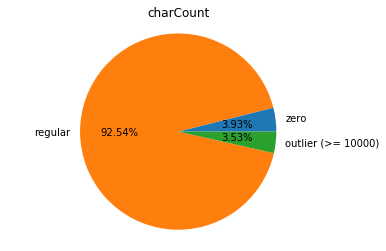

In [63]:
counts = [0, 0, 0]
for char_count in df["charCount"]:
    if char_count == 0:
        counts[0] += 1
    elif char_count < 10000:
        counts[1] += 1
    else:
        assert char_count >= 10000
        counts[2] += 1

plt.pie(counts, labels=[
    "zero", "regular", "outlier (>= 10000)"
], autopct="%.2f%%")

plt.axis("equal")
plt.title("charCount")

Text(0,0.5,'Frequency')

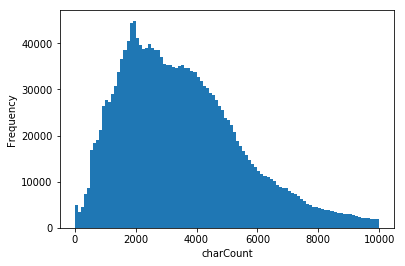

In [57]:
char_counts = [
    char_count for char_count in df["charCount"]
    if 0 < char_count < 10000
]
bins = list(range(0, 10000 + 1, 100))

plt.hist(char_counts, bins=bins)
plt.xlabel("charCount")
plt.ylabel("Frequency")

Text(0.5,1,'starRating')

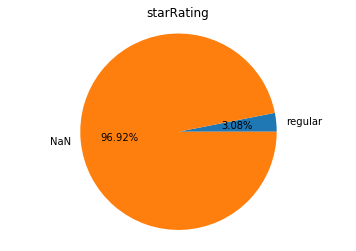

In [48]:
counts = [0, 0]
for star_rating in df["starRating"]:
    if isnan(star_rating):
        counts[1] += 1
    else:
        counts[0] += 1

plt.pie(counts, labels=[
    "regular", "NaN"
], autopct="%.2f%%")

plt.axis("equal")
plt.title("starRating")

Text(0.5,1,'starRating')

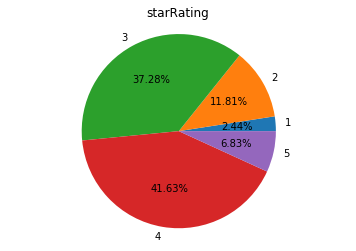

In [54]:
counts = [0, 0, 0, 0, 0]
for star_rating in df["starRating"]:
    if isnan(star_rating):
        continue
    counts[int(star_rating) - 1] += 1

plt.pie(counts, labels=[
    "1", "2", "3", "4", "5"
], autopct="%.2f%%")

plt.axis("equal")
plt.title("starRating")

Text(0.5,1,'wordCount')

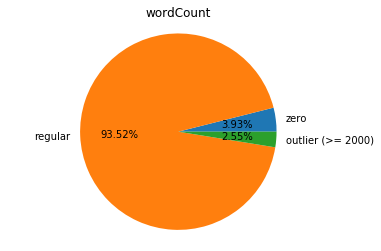

In [66]:
counts = [0, 0, 0]
for word_count in df["wordCount"]:
    if word_count == 0:
        counts[0] += 1
    elif word_count < 2000:
        counts[1] += 1
    else:
        assert word_count >= 2000
        counts[2] += 1

plt.pie(counts, labels=[
    "zero", "regular", "outlier (>= 2000)"
], autopct="%.2f%%")

plt.axis("equal")
plt.title("wordCount")

Text(0,0.5,'Frequency')

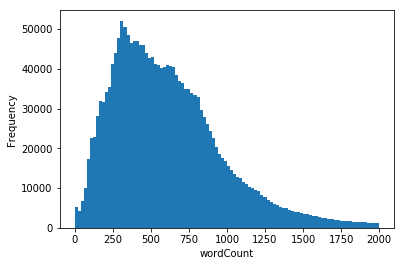

In [104]:
word_counts = [
    word_count for word_count in df["wordCount"]
    if 0 < word_count < 2000
]
bins = list(range(0, 2000 + 1, 20))

plt.hist(word_counts, bins=bins)
plt.xlabel("wordCount")
plt.ylabel("Frequency")

Text(0,0.5,'charCount')

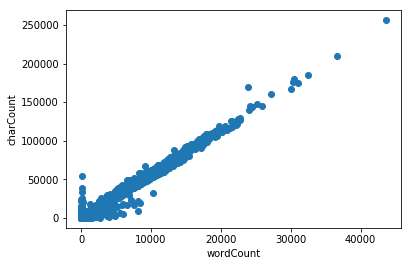

In [69]:
plt.scatter(df["wordCount"], df["charCount"])
plt.xlabel("wordCount")
plt.ylabel("charCount")

In [81]:
nonzero_indices, = df["wordCount"].nonzero()
char_counts = df["charCount"].iloc[nonzero_indices]
word_counts = df["wordCount"].iloc[nonzero_indices]

chars_per_word = char_counts / word_counts
chars_per_word.describe()

count   1977079.0000
mean          5.9464
std          12.1452
min           0.0000
25%           5.7134
50%           5.8964
75%           6.0766
max       10852.0000
dtype: float64

In [102]:
nonzero_indices, = df["wordCount"].nonzero()
char_counts = df["charCount"].iloc[nonzero_indices]
word_counts = df["wordCount"].iloc[nonzero_indices]

chars_per_word = char_counts / word_counts

counts = [0, 0, 0]
for value in chars_per_word:
    if value < 5:
        counts[0] += 1
    elif 5 <= value < 7:
        counts[1] += 1
    else:
        assert value >= 7
        counts[2] += 1

display("Low outlier (< 5): " + "{:.2%}".format(counts[0] / len(chars_per_word)))
display("Regular: " + "{:.2%}".format(counts[1] / len(chars_per_word)))
display("High outlier (>= 7): " + "{:.2%}".format(counts[2] / len(chars_per_word)))

'Low outlier (< 5): 0.34%'

'Regular: 99.39%'

'High outlier (>= 7): 0.27%'

([<matplotlib.axis.XTick at 0x118781a90>,
 <a list of 11 Text xticklabel objects>)

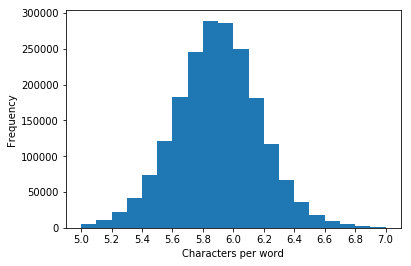

In [79]:
nonzero_indices, = df["wordCount"].nonzero()
char_counts = df["charCount"].iloc[nonzero_indices]
word_counts = df["wordCount"].iloc[nonzero_indices]

chars_per_word = char_counts / word_counts

plt.hist(chars_per_word, bins=np.linspace(5, 7, 20 + 1))
plt.xlabel("Characters per word")
plt.ylabel("Frequency")
plt.xticks(np.linspace(5, 7, 10 + 1))